In [112]:
%matplotlib inline

from pathlib import Path
import os
import numpy as np
import matplotlib.pyplot as plt
from numpy.lib import stride_tricks

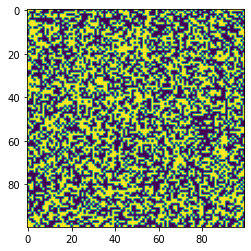

In [184]:
FOLDER = Path(os.path.dirname(os.path.realpath("__file__"))) / 'data'
in_file = 'day20.txt'

with open(FOLDER / in_file) as f:
    algorithm = np.array([int(char == '#') for char in f.readline().strip()])
    next(f)
    image = np.array([[int(char == '#') for char in line.strip()] for line in f])

plt.imshow(image)


solution 1:  5379


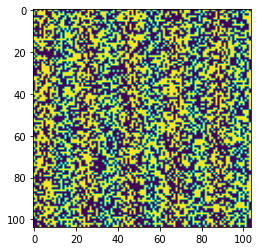

In [256]:
def process_image(img, runs):
    fill=0
    for run in range(runs):
        img = np.pad(img, 2, constant_values=fill)
        
        window_size = img.shape[0] - 2

        window  = stride_tricks.sliding_window_view(img, (3, 3)) # requires Numpy >= 1.20 
        window = np.reshape(window, (window_size, window_size, 9))

        # window[:,:,1:] is w x h x 8
        bits = np.packbits(window[:,:,1:], bitorder='big').reshape(window_size, window_size)
        bits = np.left_shift(window[:, :, 0], 8) + bits

        img = algorithm[bits]
        
        fill = not fill # Doh! fill needs to change on iterations!
        
    return img


im = process_image(image, 2)

print("solution 1: ", im.sum())
plt.imshow(im)

solution 2:  17917


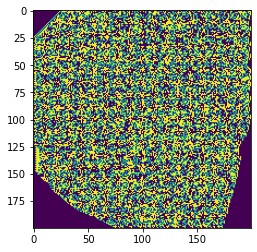

In [260]:
im = process_image(image, 50)

print("solution 2: ", im.sum())
plt.imshow(im)